<a href="https://colab.research.google.com/github/higordevellard/Customer_churn_in_a_bank/blob/main/machine_learning_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Customer Churn In a Bank

## 1.Motivation

This project aims to develop a machine-learning model capable of predicting which customers are more likely to keep their account active and which customers are more likely to close their bank account.


## 2.Used Packages

In [1]:
# Configuration to not display warnings for selected packages
import warnings
warnings.filterwarnings("ignore")

# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

## 3.Dataset Load

The dataset chosen for this project is available in Kaggle, and can be access in the following address: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


In [2]:
# Dataset location
url_1 = 'https://raw.githubusercontent.com/higordevellard/Rotatividade_de_clientes_em_um_banco/main/Customer-Churn-Records.csv'

# Dataset attribute labels
labels_atributos = ['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',\
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',\
                    'Card Type', 'Point Earned']

# Read the dataset
dataset = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')


### **3.1.Dataset Information**

* The dataset loaded belongs to an anonymous multinational bank, the dataset contains account holder information (non-confidential information) that will be used to create a model.

* The Attributes present in the dataset are:

**'ID'**: ID corresponding to the account holder.

**'Surname'**: Account holder's last name.

**'CreditScore'**: Returns the score that the account holder has accumulated.

**'Geography'**: Customer geographic location.

**'Gender'**: Returns the account holder's gender.

**'Age'**: Account holder's age.

**'Tenure'**: Returns the number of years the account holder has at the bank.

**'Balance'**: Returns what the account holder has already spent on purchases using the card.

**'NumOfProducts'**: Returns the amount of products that the account holder has already purchased through the bank.

**'HasCrCard'**: Returns whether the account holder has a credit card with the bank or not.

**'IsActiveMember'**: Sorts whether the account holder is an active member or not.

**'EstimatedSalary'**: Returns the customer's estimated salary in Euros.

**'Exited'**: Returns whether the account holder closed the account or not.

**'Complain'**: Returns whether the customer has already made a complaint to the bank or not.

**'Satisfaction Score'**: Returns the customer's score with the bank.

**'Card Type'**: Returns the type of card the customer has.

**'Point Earned'**: Returns the customer's score with the purchases made by the card.




## 4.Exploratory Data Analysis

###4.1 Analysis and Data Processing

In [3]:
# Shows the dimensions of the dataset (rows and columns)
dataset.shape

(10000, 17)

In [4]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Poin

**Important notes raised following the results of the .info() function:**

1)All 17 attributes were properly loaded.

2) All 10,000 Instances (rows) are non-null (No missings).



In [5]:
# Check for duplicate rows in the dataset.
print(dataset.duplicated().sum())

0


In [6]:
# Display the first 5 rows of the dataset
dataset.head(5)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### **4.2. Descriptive Statistics**

As the attributes 'ID' and 'Surname' are not important for the analysis, both columns will be removed.

In [7]:
dataset_2 = dataset.drop(["ID", 'Surname'], axis=1)

In [8]:
# Statistical summary of the dataset.
dataset_2.drop(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember',\
               'Exited', 'Complain','Satisfaction Score','Card Type'], axis=1).describe().round(2)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24,606.52
std,96.65,10.49,2.89,62397.41,0.58,57510.49,225.92
min,350.00,18.00,0.00,0.00,1.00,11.58,119.00
25%,584.00,32.00,3.00,0.00,1.00,51002.11,410.00
50%,652.00,37.00,5.00,97198.54,1.00,100193.92,605.00
75%,718.00,44.00,7.00,127644.24,2.00,149388.25,801.00
max,850.00,92.00,10.00,250898.09,4.00,199992.48,1000.00


Considerando os 1000 registros analisados, é apresentado os valores de (média, desvio padrão, mínimo, máximo e os quartis).

In [9]:
# Get the unique values ​​for each specific attribute
atributos = ['Geography', 'Gender', 'Card Type']
for atributo in atributos:
    valores_unicos = dataset_2[atributo].unique()
    print(f"Unique values ​​for the attribute '{atributo}':")
    print(valores_unicos)
    print()

Unique values ​​for the attribute 'Geography':
['France' 'Spain' 'Germany']

Unique values ​​for the attribute 'Gender':
['Female' 'Male']

Unique values ​​for the attribute 'Card Type':
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']



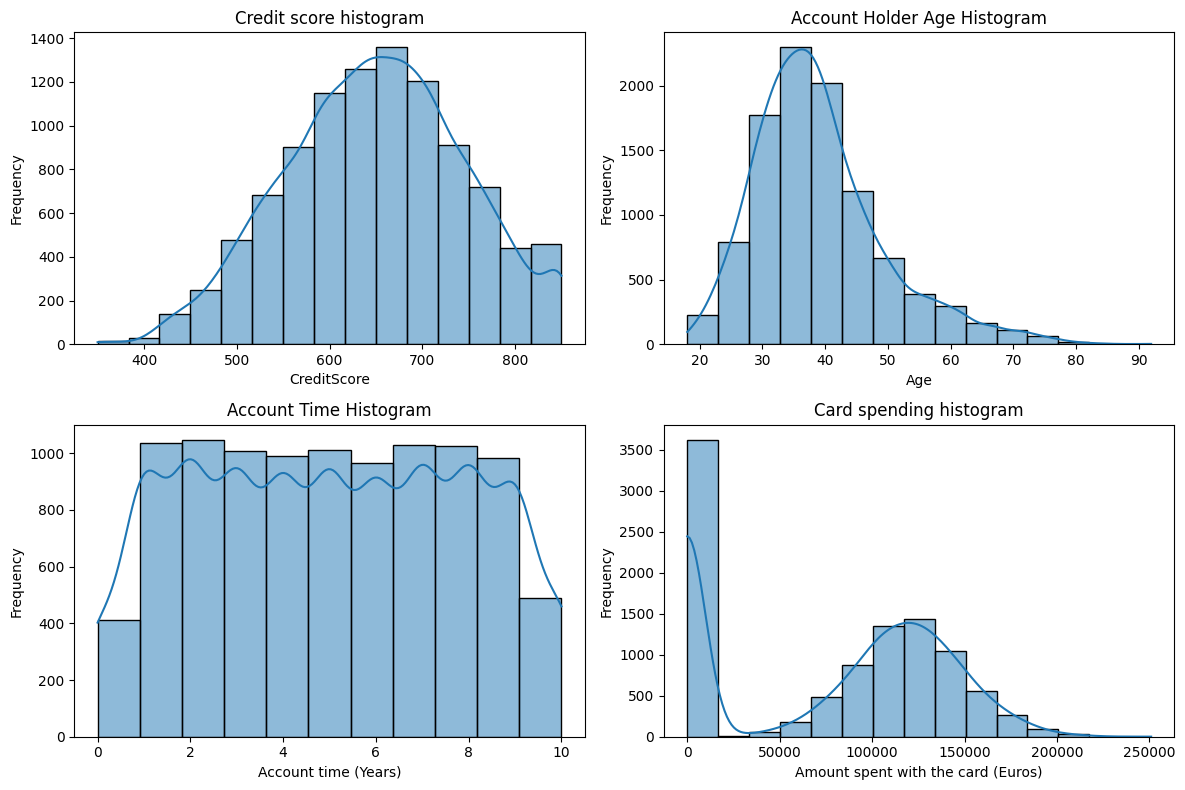

In [10]:
# Create a subplot with two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the credit score histogram
sns.histplot(dataset_2['CreditScore'], kde=True, bins=15, ax=axs[0, 0])
axs[0, 0].set_xlabel('CreditScore')
axs[0, 0].set_ylabel( "Frequency")
axs[0, 0].set_title("Credit score histogram")

# Plot the Age histogram
sns.histplot(dataset_2['Age'], kde=True, bins=15, ax=axs[0, 1])
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel( "Frequency")
axs[0, 1].set_title("Account Holder Age Histogram")

# Plot account holder account time histogram
sns.histplot(dataset_2['Tenure'], kde=True, bins=11, ax=axs[1, 0])
axs[1, 0].set_xlabel("Account time (Years)")
axs[1, 0].set_ylabel( "Frequency")
axs[1, 0].set_title("Account Time Histogram")

# Plot the histogram of card spending
sns.histplot(dataset_2['Balance'], kde=True, bins=15, ax=axs[1, 1])
axs[1, 1].set_xlabel("Amount spent with the card (Euros)")
axs[1, 1].set_ylabel( "Frequency")
axs[1, 1].set_title("Card spending histogram")

# Layout tweak
plt.tight_layout()

# Display of histograms
plt.show()

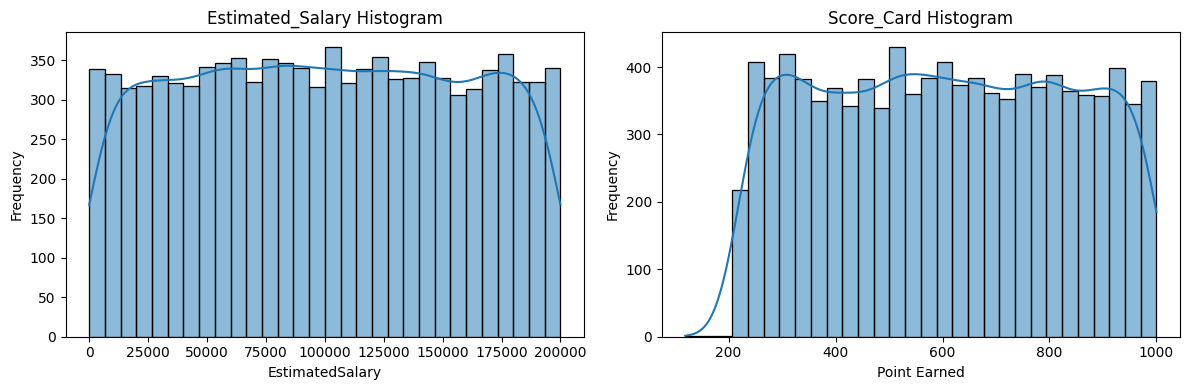

In [11]:
# Create a subplot with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the histogram of Estimated_Salary
sns.histplot(dataset_2['EstimatedSalary'], kde=True, bins=30, ax=axs[0])
axs[0].set_xlabel('EstimatedSalary')
axs[0].set_ylabel( "Frequency")
axs[0].set_title("Estimated_Salary Histogram")

# Plot the histogram of Card_Score
sns.histplot(dataset_2['Point Earned'], kde=True, bins=30, ax=axs[1])
axs[1].set_xlabel('Point Earned')
axs[1].set_ylabel( "Frequency")
axs[1].set_title("Score_Card Histogram")

plt.tight_layout()

plt.show()

With the histograms presented, we have the following observations:

The highest concentration of account holders has around 650 points on their credit card.

Most account holders are between 30 and 40 years old.

There is a balanced amount of customers who have an account between 1 and 9 years at the bank.

In the histogram that shows the accumulated expenses with the card, around 3500 have zero expenses, since many account holders do not have a credit card or have one but have not used it.

The estimated salary of account holders has a flattened behavior in the histogram, as well as the card score histogram.



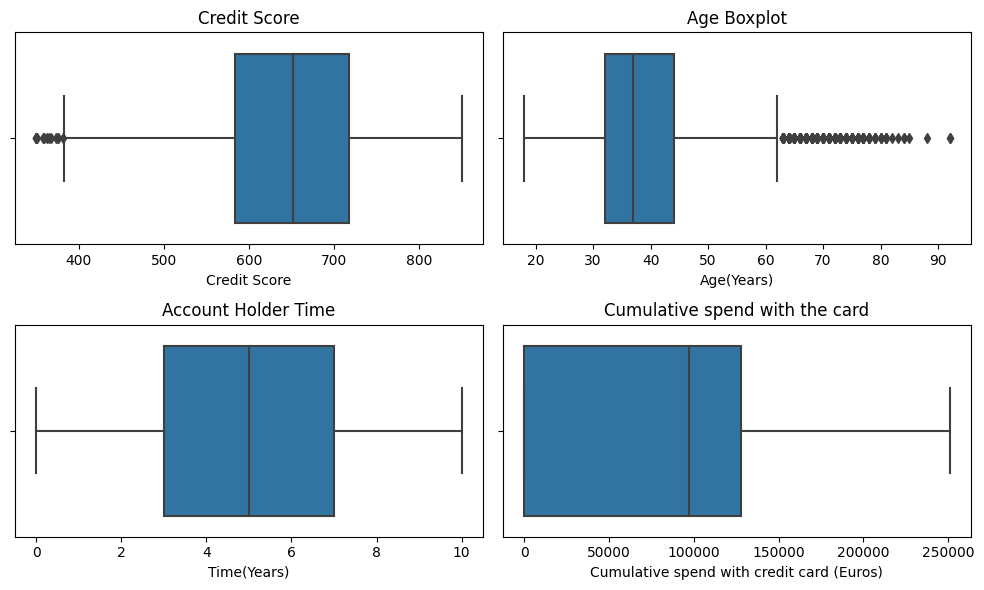

In [12]:
# Create a subplot with two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot the credit score boxplot
sns.boxplot(x='CreditScore', data=dataset_2, ax=axs[0, 0])
axs[0, 0].set_title("Credit Score")
axs[0, 0].set_xlabel("Credit Score")

# Plot the Age boxplot
sns.boxplot(x='Age', data=dataset_2, ax=axs[0, 1])
axs[0, 1].set_title("Age Boxplot")
axs[0, 1].set_xlabel("Age(Years)")

# Plot the account holder's time boxplot
sns.boxplot(x='Tenure', data=dataset_2, ax=axs[1, 0])
axs[1, 0].set_title("Account Holder Time")
axs[1, 0].set_xlabel("Time(Years)")

# Plot the Card Spent boxplot
sns.boxplot(x='Balance', data=dataset_2, ax=axs[1, 1])
axs[1, 1].set_title("Cumulative spend with the card")
axs[1, 1].set_xlabel("Cumulative spend with credit card (Euros)")

plt.tight_layout()

plt.show()

The Boxplot presented indicates outliers only for credit score and age, but they are not in fact outliers, so they will not be removed.




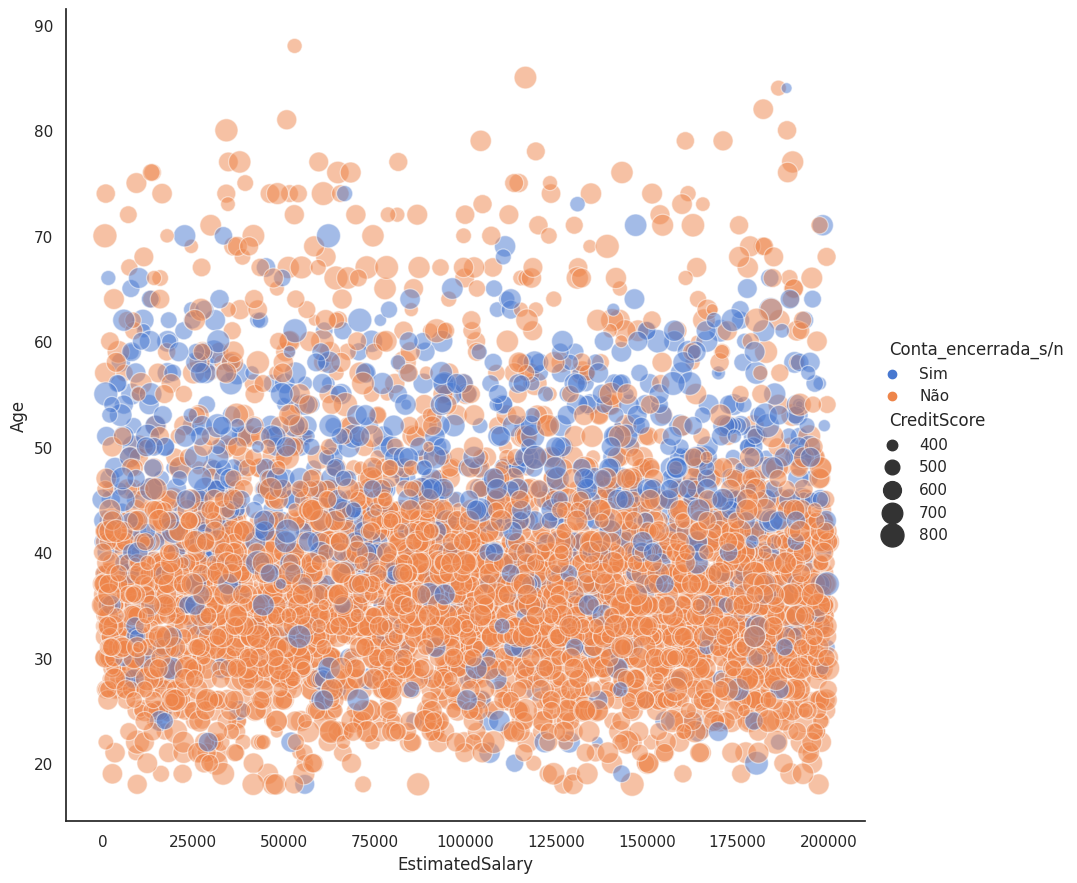

In [13]:
# Map the values ​​"1" to "Male" and "0" to "Female"
dataset_2["Conta_encerrada_s/n"] = dataset_2['Exited'].map({1: "Sim", 0: "Não"})
dataset_2["Cartão_de_crédito_s/n"] = dataset_2['HasCrCard'].map({1: "Sim", 0: "Não"})
dataset_2["Membro_ativo_s/n"] = dataset_2['IsActiveMember'].map({1: "Sim", 0: "Não"})

sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='EstimatedSalary', y='Age', hue="Conta_encerrada_s/n", size='CreditScore',
            sizes=(30, 300), alpha=.5, palette="muted",
            height=9, data=dataset_2[:5000])  # Limiting to 5000 samples

The graph above shows that for ages between 40 and 65, the possibility of account holders closing their account increases.

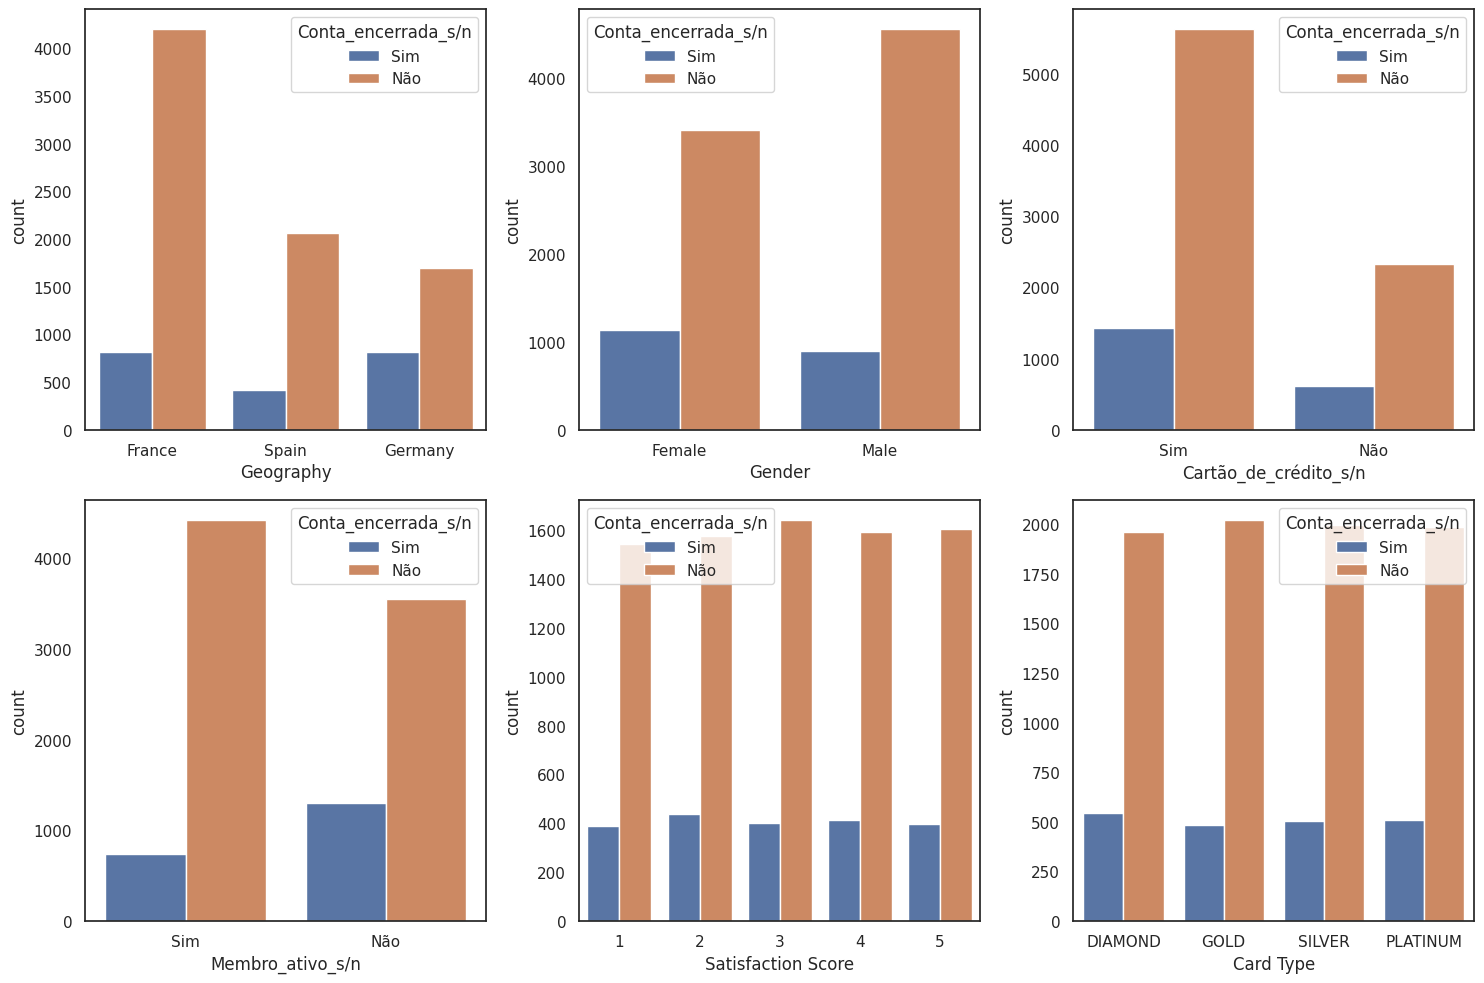

In [14]:
# list of categorical variables to plot
categoricos = ['Geography', 'Gender', 'Cartão_de_crédito_s/n', 'Membro_ativo_s/n', 'Satisfaction Score', 'Card Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(categoricos):
    sns.countplot(x=var, hue='Conta_encerrada_s/n', data=dataset_2, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

with the goal of analyze which instances are most common for customers who close or not their account, the graphs above show this relationship.

**Correlation Heatmap**

<Axes: >

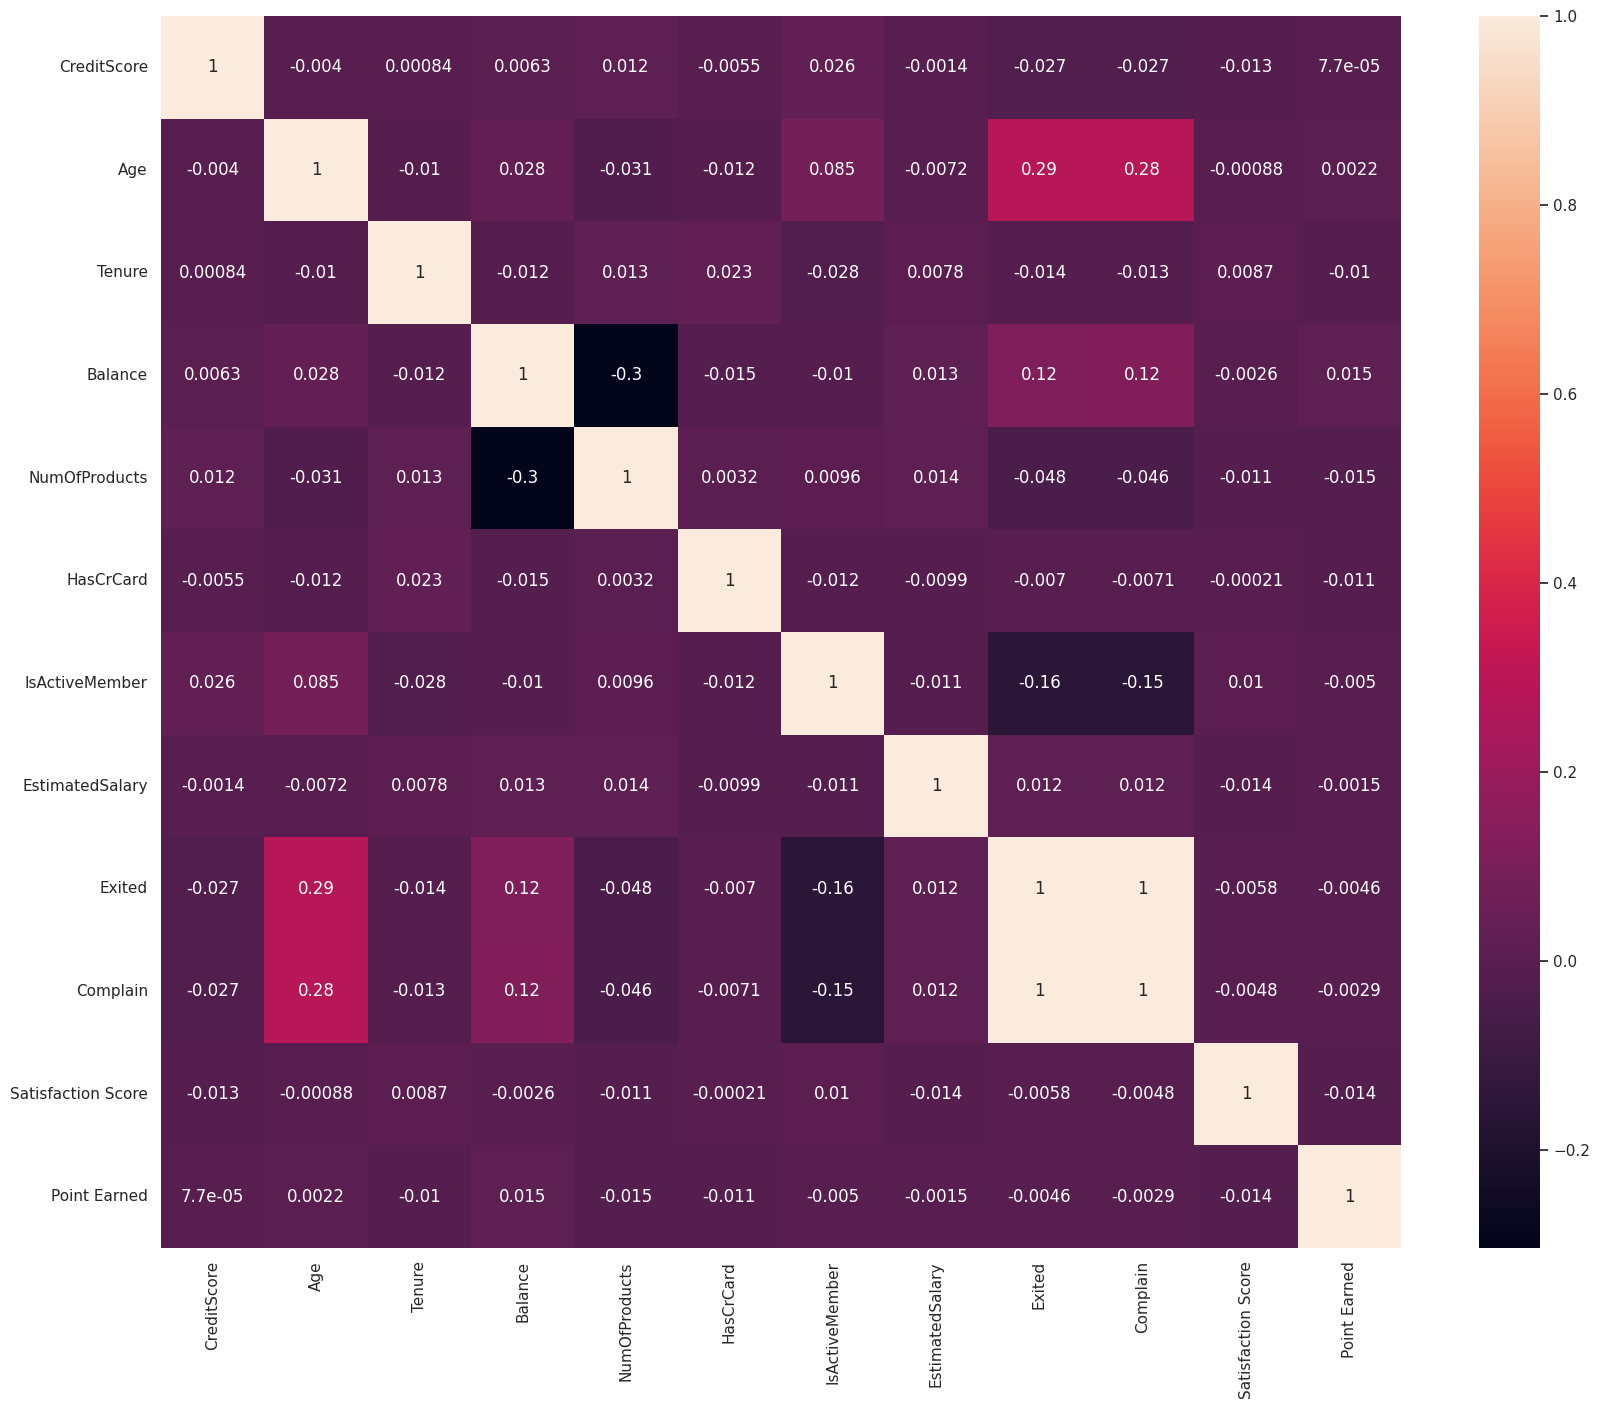

In [15]:
#Find the correlation between the attributes
plt.figure(figsize=(20, 16))
sns.heatmap(dataset_2.corr(), fmt='.2g', annot=True)

**Label Encoding**

In [16]:
dataset_3 = dataset_2.drop(["Conta_encerrada_s/n", "Cartão_de_crédito_s/n", "Membro_ativo_s/n" ], axis=1)

In [17]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in dataset_3.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(dataset_3[col].unique())
    
    # Transform the column using the encoder
    dataset_3[col] = label_encoder.transform(dataset_3[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {dataset_3[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]
Card Type: [0 1 3 2]


## **5.Modeling and Inference**

### 5.1.Separation into training set and test set with holdout

In [18]:
# Move the 'Exited' column to the last column
conta_encerrada = dataset_3.pop('Exited')
dataset_3.insert(len(dataset_3.columns), 'Exited', conta_encerrada)

In [19]:
test_size = 0.20 # test set size
seed = 7 # random seed

# Separation into training and test sets
array = dataset_3.values
X = array[:,0:14]
y = array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Importance of Attributes with ExtraTrees

# Creation of the model for attribute selection
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Display the original attributes
print("\nAtributos Originais:", dataset_3.columns[0:14])

# Displays the importance score for each attribute (the higher the score, the more important the attribute).
print(modelo.feature_importances_)

# Cross-validation parameters and partitions
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # cross-validation with stratification


Atributos Originais: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')
[0.00433196 0.00801101 0.00414392 0.02672614 0.00373549 0.00876032
 0.03681461 0.00144925 0.01417112 0.00421614 0.87753676 0.00285268
 0.00297303 0.00427755]


In [20]:
print("Dados de treino:")
print(X_train) # Print first lines of training attributes
print(y_train) # Display first lines of training labels

Dados de treino:
[[779.   0.   0. ...   4.   0. 341.]
 [614.   1.   1. ...   5.   2. 238.]
 [679.   0.   1. ...   5.   2. 713.]
 ...
 [646.   0.   0. ...   1.   2. 570.]
 [588.   0.   0. ...   5.   2. 834.]
 [554.   0.   1. ...   5.   3. 544.]]
[0. 0. 0. ... 0. 0. 0.]


### 5.2.Creation and evaluation of models: baseline

LR: 0.798250 (0.017750)
KNN: 0.757250 (0.006842)
CART: 0.996750 (0.003410)
NB: 0.796125 (0.004523)
SVM: 0.796250 (0.000000)
Bagging: 0.998375 (0.000976)
RF: 0.998625 (0.000875)
ET: 0.998500 (0.000750)
Ada: 0.998375 (0.001125)
GB: 0.998500 (0.000750)
Voting: 0.821000 (0.019786)


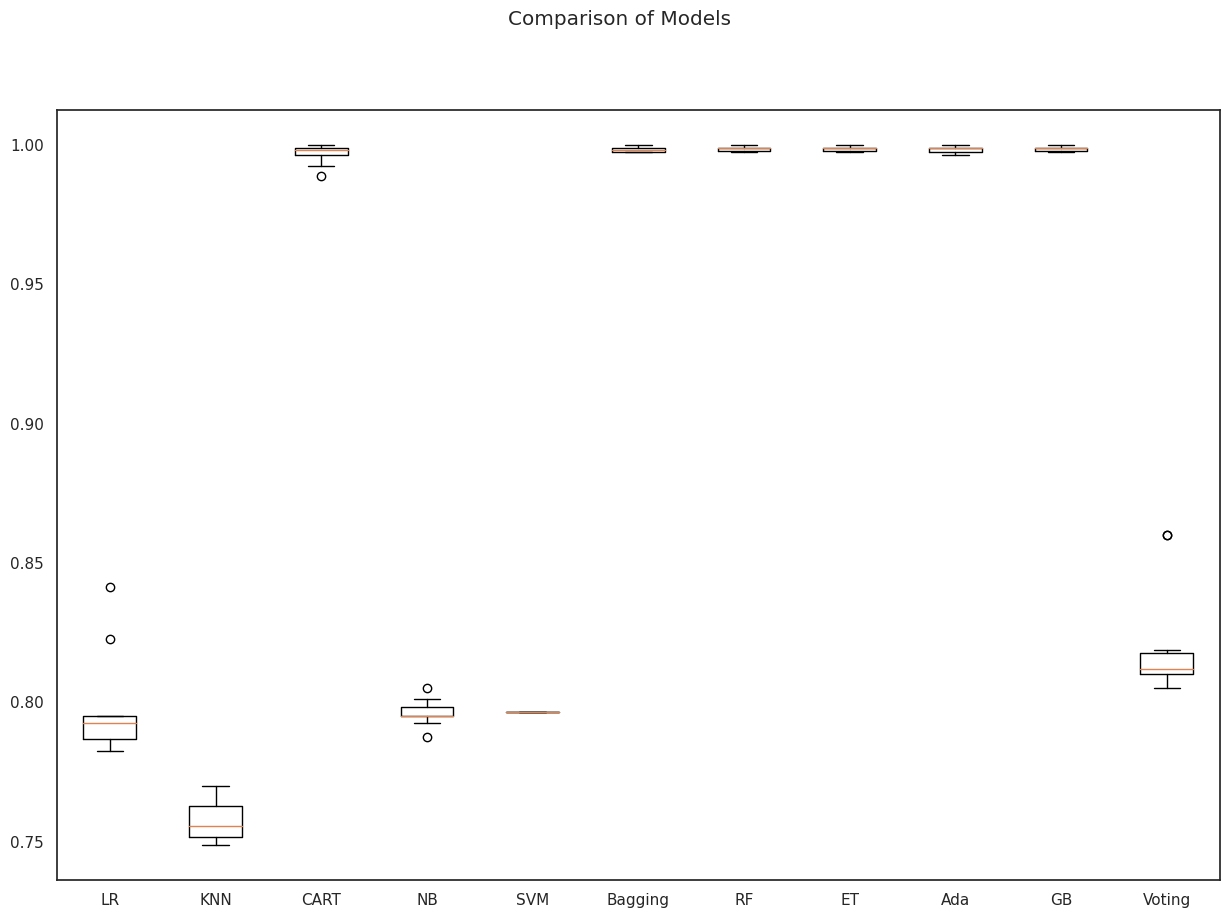

In [21]:
np.random.seed(7) # defining a global seed

# List that will store the models
models = []

# Creating the templates and adding them to the template list
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Defining the base classifier parameters for the BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating the models for the VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating the ensembles and adding them to the template list
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store the results
results = []
names = []

# Evaluation of the models
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Model comparison boxplot
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparison of Models') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### **5.3.Creation and evaluation of models: standardized and normalized data**

Considering that some models may present better results when the data are standardized or normalized, a comparison will be made to assess whether any algorithm will overcome the accuracy achieved so far.

LR-orig: 0.798 (0.018)
KNN-orig: 0.757 (0.007)
CART-orig: 0.997 (0.003)
NB-orig: 0.796 (0.005)
SVM-orig: 0.796 (0.000)
Bag-orig: 0.998 (0.001)
RF-orig: 0.999 (0.001)
ET-orig: 0.998 (0.001)
Ada-orig: 0.998 (0.001)
GB-orig: 0.998 (0.001)
Vot-orig: 0.821 (0.020)
LR-padr: 0.999 (0.001)
KNN-padr: 0.997 (0.002)
CART-padr: 0.997 (0.002)
NB-padr: 0.999 (0.001)
SVM-padr: 0.999 (0.001)
Bag-padr: 0.998 (0.001)
RF-padr: 0.999 (0.001)
ET-padr: 0.998 (0.001)
Ada-padr: 0.998 (0.001)
GB-padr: 0.998 (0.001)
Vot-padr: 0.999 (0.001)
LR-norm: 0.999 (0.001)
KNN-norm: 0.999 (0.001)
CART-norm: 0.997 (0.002)
NB-norm: 0.999 (0.001)
SVM-norm: 0.999 (0.001)
Bag-norm: 0.998 (0.001)
RF-norm: 0.999 (0.001)
ET-norm: 0.998 (0.001)
Ada-norm: 0.998 (0.001)
GB-norm: 0.998 (0.001)
Vot-norm: 0.999 (0.001)


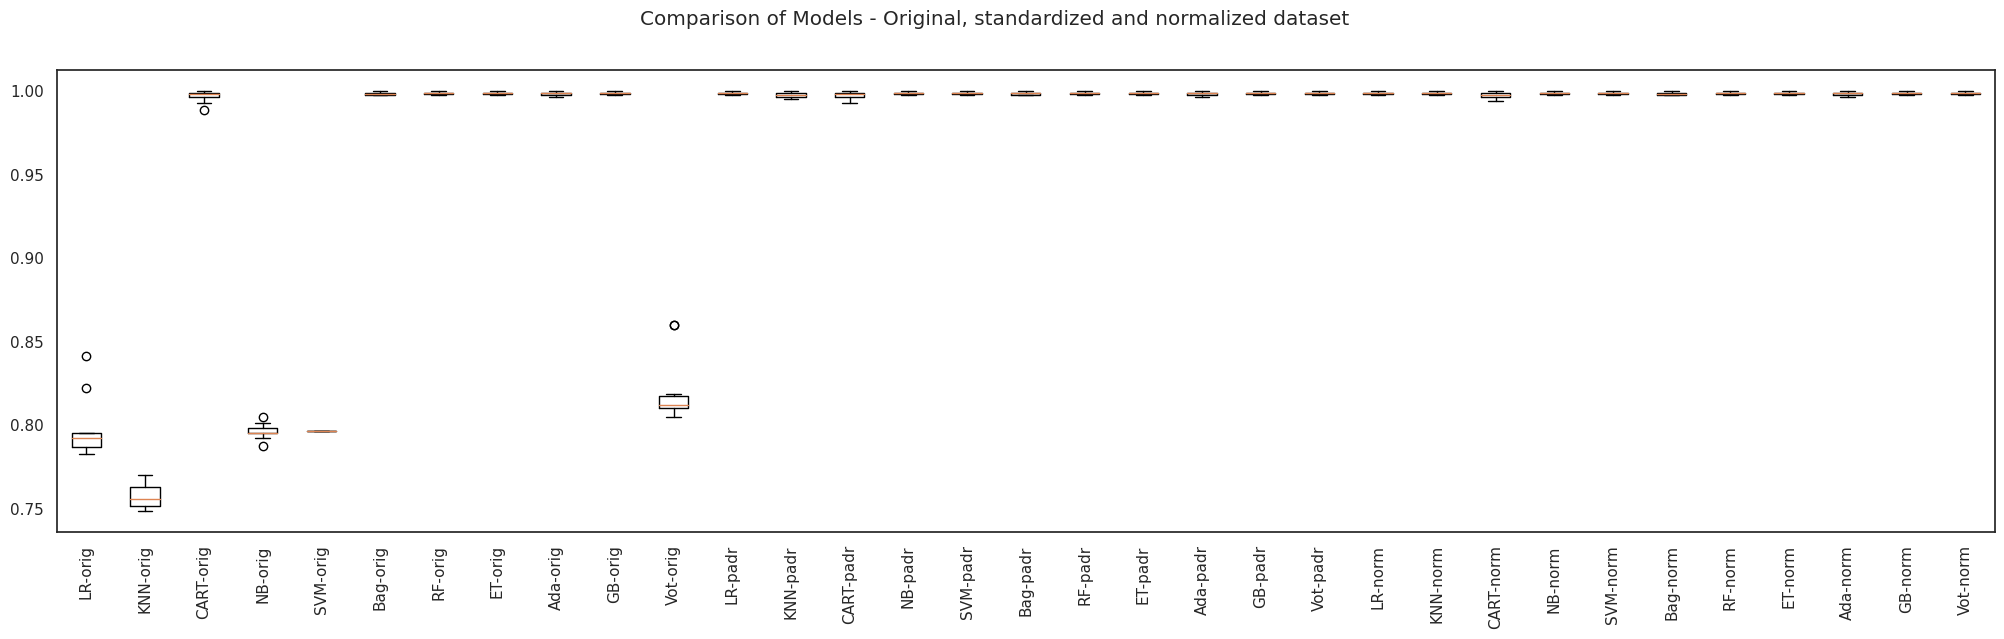

In [22]:
np.random.seed(7) # defining a global seed for this block

# Lists to store pipelines and results for all dataset views
pipelines = []
results = []
names = []

# Creating the pipeline elements

# Algorithms to be used
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformations that will be used
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Assembling the pipelines

# original dataset
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Standardized dataset
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalized dataset
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Running the pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Model comparison boxplot
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparison of Models - Original, standardized and normalized dataset') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### **5.4. ROC Curve**

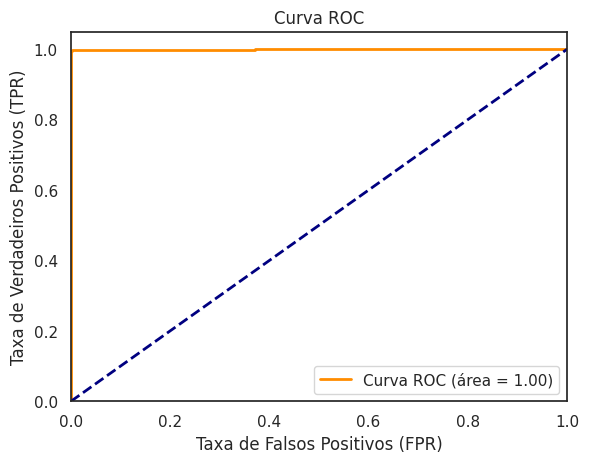

Acurácia: 0.9985


In [23]:
# Preparing the model
scaler = StandardScaler().fit(X_train) # adjust the scaler with the training set
rescaledX = scaler.transform(X_train) # apply patterning to the training set
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimate of predicted probability
rescaledTestX = scaler.transform(X_test) # apply patterning to the test set
y_scores = model.predict_proba(rescaledTestX)[:, 1]

# Calculation of the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Accuracy evaluation
predictions = model.predict(rescaledTestX)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

## **6.Simulating model application on unseen data**

In [24]:
# New data - we don't know the class!
data = {'CreditScore':  [567, 720, 630],
        'Geography': [0, 1, 2],
        'Gender': [1, 1, 0],
        'Age': [30, 37, 60], 
        'Tenure': [5, 4, 2],
        'Balance': [52000, 57470, 67460],
        'NumOfProducts': [2, 3, 1],
        'HasCrCard': [1, 1, 1],
        'IsActiveMember': [1, 1, 0],
        'EstimatedSalary': [75000, 64000, 82000],
        'Complain': [0, 0, 1],
        'Satisfaction Score': [5, 3, 3],
        'Card Type': [1, 2, 0],
        'Point Earned': [610, 490, 520],
        }

atributos = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Balance', \
             'HasCrCard','IsActiveMember','EstimatedSalary','Complain','Satisfaction Score',\
             'Card Type','Point Earned']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:, np.r_[0:14]].astype(float)

# Standardization in the input data using the scaler used in X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-8.54904057e-01 -9.04509479e-01  9.10258990e-01 -8.57068522e-01
  -3.70494009e-03 -3.92709821e-01  8.09903574e-01  1.14050974e+05
   9.68980855e-01 -1.74541488e+00  1.85906581e+05 -2.14015578e+00
   3.13368631e+00 -2.68534901e+00]
 [ 7.31090250e-01  2.99296182e-01  9.10258990e-01 -1.90330028e-01
  -3.48350530e-01 -3.05305739e-01  2.52625552e+00  1.26048422e+05
   9.68980855e-01 -1.74541488e+00  1.58640208e+05 -2.14015578e+00
   1.34588168e+00 -2.68092527e+00]
 [-2.01847578e-01  1.50310184e+00 -1.09858844e+00  2.00038217e+00
  -1.03764171e+00 -1.45677444e-01 -9.06448370e-01  1.47959666e+05
   9.68980855e-01 -1.74543237e+00  2.03257909e+05 -1.43237379e+00
   1.34588168e+00 -2.68977275e+00]]


In [25]:
# Class prediction of input data
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 1.]
